In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('F1.csv', index_col='ResultId')
df.drop("Unnamed: 0", axis= 1, inplace=True)
df.tail()

,RaceId,Year,GP,CircuitId,DriverId,ConstructorId,Constructor Name,Driver Name,Circuit,Final position,...,Total gained/lost positions,Index DNF/Driver,Index DNF/Constructor,Average Lost laps,Circuit Speed,Result_Race-1,Result_Race-2,Result_Race-3,Result_Race-4,Result_Race-5
ResultId,,,,,,,,,,,,,,,,,,,,,
25841.0,1096,2022,22,24,854,210,Haas F1 Team,Schumacher,yas_marina,16.0,...,-3.0,0.090909,0.136364,0.428571,192.0,13.0,16.0,15.0,17.0,13.0
25842.0,1096,2022,22,24,825,210,Haas F1 Team,Magnussen,yas_marina,17.0,...,-25.0,0.181818,0.136364,0.380952,192.0,19.0,17.0,9.0,14.0,12.0
25843.0,1096,2022,22,24,1,131,Mercedes,Hamilton,yas_marina,18.0,...,23.0,0.045455,0.045455,0.047619,192.0,2.0,2.0,2.0,5.0,9.0
25844.0,1096,2022,22,24,849,3,Williams,Latifi,yas_marina,19.0,...,27.0,0.181818,0.181818,0.571429,192.0,16.0,18.0,17.0,9.0,19.0
25845.0,1096,2022,22,24,4,214,Alpine F1 Team,Alonso,yas_marina,20.0,...,-22.0,0.227273,0.159091,0.190476,192.0,5.0,19.0,7.0,7.0,18.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2460 entries, 23379.0 to 25845.0
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RaceId                       2460 non-null   int64  
 1   Year                         2460 non-null   int64  
 2   GP                           2460 non-null   int64  
 3   CircuitId                    2460 non-null   int64  
 4   DriverId                     2460 non-null   int64  
 5   ConstructorId                2460 non-null   int64  
 6   Constructor Name             2460 non-null   object 
 7   Driver Name                  2460 non-null   object 
 8   Circuit                      2460 non-null   object 
 9   Final position               2460 non-null   float64
 10  DNF                          2460 non-null   float64
 11  Fastest Lap Rank             2460 non-null   int64  
 12  Grid position                2460 non-null   float64
 13  Average

In [4]:
df['Drivers points'].fillna(0, inplace=True)

In [5]:
df['¿Points?'] = 0
df['¿Points?'][df['Final position'] <=10] = 1
df['¿Points?'][df['Final position'] > 10] = 0

C:\Users\ramon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ramon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.columns

Index(['RaceId', 'Year', 'GP', 'CircuitId', 'DriverId', 'ConstructorId',
       'Constructor Name', 'Driver Name', 'Circuit', 'Final position', 'DNF',
       'Fastest Lap Rank', 'Grid position', 'Average pace', 'Q1', 'Q2', 'Q3',
       'Qualifying position', 'Victories', 'Drivers points',
       'Constructors points', 'Constructors victories', 'Start from Pitlane',
       'Total gained/lost positions', 'Index DNF/Driver',
       'Index DNF/Constructor', 'Average Lost laps', 'Circuit Speed',
       'Result_Race-1', 'Result_Race-2', 'Result_Race-3', 'Result_Race-4',
       'Result_Race-5', '¿Points?'],
      dtype='object')

In [7]:
df['Result_Race-1'].fillna(10, inplace=True)
df['Result_Race-2'].fillna(10, inplace=True)
df['Result_Race-3'].fillna(10, inplace=True)
df['Result_Race-4'].fillna(10, inplace=True)
df['Result_Race-5'].fillna(10, inplace=True)

<AxesSubplot:>

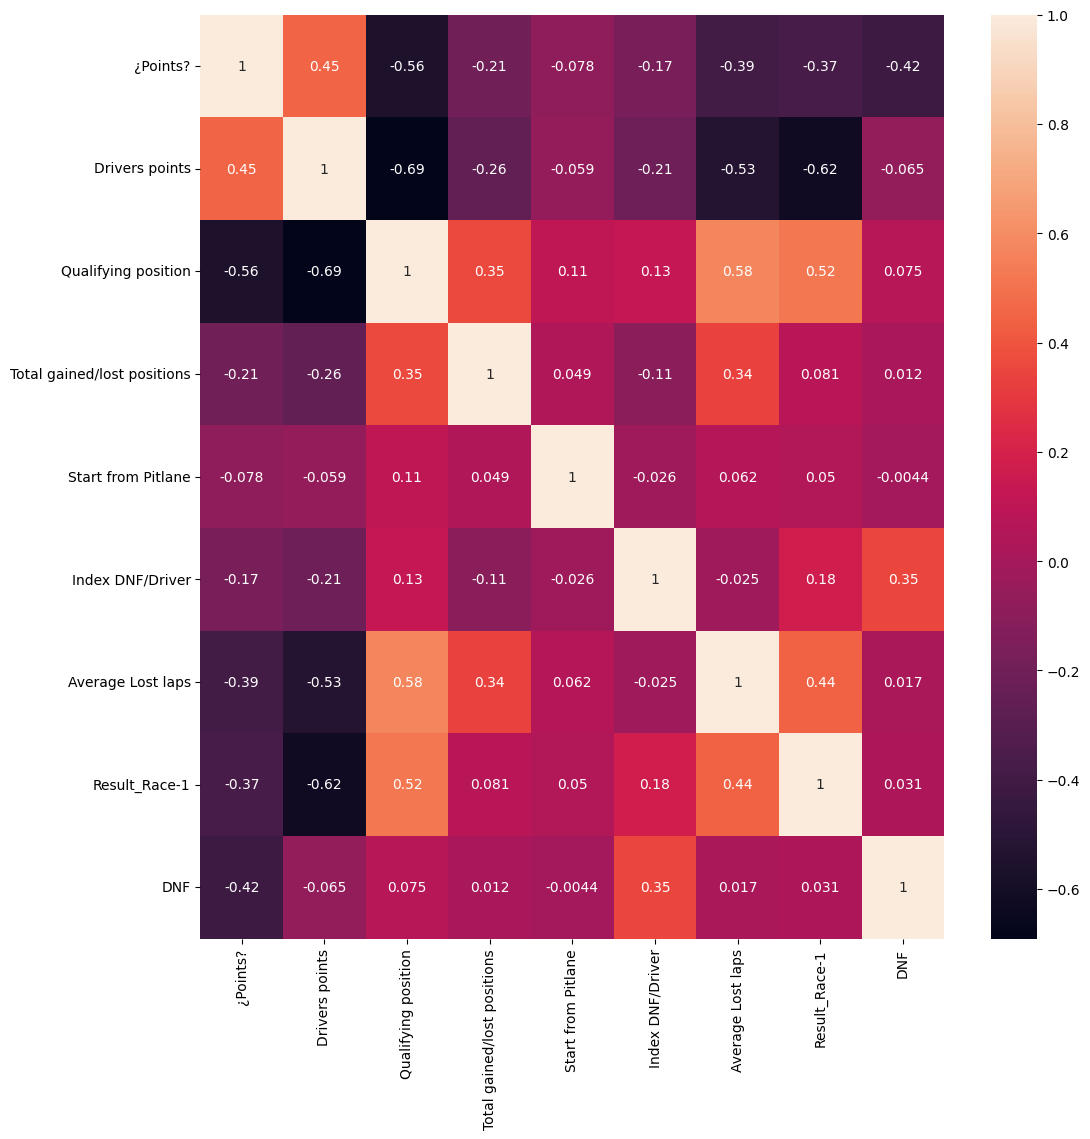

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df[['¿Points?','Drivers points', 'Qualifying position', 
                'Total gained/lost positions', 'Start from Pitlane', 'Index DNF/Driver',
                'Average Lost laps', 'Result_Race-1', 'DNF']].corr(), annot=True)

In [9]:
df.describe()

,RaceId,Year,GP,CircuitId,DriverId,ConstructorId,Final position,DNF,Fastest Lap Rank,Grid position,...,Index DNF/Driver,Index DNF/Constructor,Average Lost laps,Circuit Speed,Result_Race-1,Result_Race-2,Result_Race-3,Result_Race-4,Result_Race-5,¿Points?
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2440.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1031.341463,2019.536585,10.821138,28.308943,655.658537,69.665041,10.500000,0.151220,9.688618,10.559756,...,0.509302,0.508935,0.337179,205.557377,10.456098,10.426423,10.408537,10.385772,10.364228,0.500000
std,37.096936,1.731429,6.025610,26.302006,335.646406,85.020075,5.767454,0.358336,5.861194,5.830401,...,0.526924,0.463256,0.376062,19.942126,5.721696,5.682664,5.650252,5.614674,5.577421,0.500102
min,969.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,153.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,999.000000,2018.000000,6.000000,9.000000,815.000000,4.000000,5.750000,0.000000,5.000000,6.000000,...,0.150000,0.181818,0.000000,193.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000
50%,1030.000000,2019.000000,11.000000,17.000000,830.000000,9.000000,10.500000,0.000000,10.000000,11.000000,...,0.314145,0.363636,0.272727,206.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.500000
75%,1064.000000,2021.000000,16.000000,39.000000,842.000000,131.000000,15.250000,0.000000,15.000000,16.000000,...,0.686364,0.714286,0.500000,224.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.000000
max,1096.000000,2022.000000,22.000000,79.000000,856.000000,214.000000,20.000000,1.000000,20.000000,21.000000,...,5.000000,2.800000,3.000000,241.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000


In [10]:
X = df[['Drivers points', 'Qualifying position', 'Result_Race-1', 
        'Total gained/lost positions', 'Index DNF/Driver', 'Average Lost laps', 'DNF']][df['GP']>3]

y = df['¿Points?'][df['GP']>3]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2100 entries, 23439.0 to 25845.0
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Drivers points               2100 non-null   float64
 1   Qualifying position          2100 non-null   float64
 2   Result_Race-1                2100 non-null   float64
 3   Total gained/lost positions  2100 non-null   float64
 4   Index DNF/Driver             2100 non-null   float64
 5   Average Lost laps            2100 non-null   float64
 6   DNF                          2100 non-null   float64
dtypes: float64(7)
memory usage: 131.2 KB


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, shuffle=False)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
# model = RandomForestClassifier(n_estimators=200,
#                                  max_leaf_nodes=32,
#                                  max_depth= 10,
#                                  random_state=42)
# model.fit(X_train, y_train)

# y_pred_rf = model.predict(X_test)
# # np.sum(y_test == y_pred_rf) / len(y_test) 
# accuracy_score(y_test, y_pred_rf)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline(steps=[('imputer', SimpleImputer()),
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear', random_state=19)],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'classifier': [RandomForestClassifier(random_state=19)],
    'classifier__max_features': [1,2,3,4],
    'classifier__max_depth': [2,3,4]
}

svm_param = {
    'classifier': [svm.SVC(random_state=19)],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
}

knn_param = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [2,3,4,5,10]
}

search_space = [
    logistic_params,
    random_forest_params,
    svm_param,
    knn_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10,
                  scoring= "accuracy")

clf.fit(X_train_scal, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            random_state=19,
                                                            solver='liblinear')],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier(random_state=19)],
                          'classifier__max_depth': [2, 3, 4],
                          'classifier__max_features': [1, 2, 3, 4]},
                         {'classifier': [SVC(C=1, random_state=19)],
                          'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [2, 3, 4, 

In [18]:
clf.best_params_

{'classifier': SVC(C=1, random_state=19), 'classifier__C': 1}

In [28]:
rnd_clf = RandomForestClassifier(n_estimators=200,
                                 max_features = 3,
                                 max_depth = 5,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train_scal, y_train)

RandomForestClassifier(max_depth=5, max_features=3, max_leaf_nodes=16,
                       n_estimators=200, random_state=42)

In [20]:
parameters = {'n_estimators': [200, 300, 400],
             'max_features' : [3,4,5],
             "max_depth" : [2,3,4,5],
             "max_leaf_nodes": [8, 16, 24],
             "random_state" : [42]
}

rnd_clf = RandomForestClassifier()

rnd_clfCV = GridSearchCV(estimator = rnd_clf,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 5,
                  scoring="accuracy")

rnd_clfCV.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5], 'max_features': [3, 4, 5],
                         'max_leaf_nodes': [8, 16, 24],
                         'n_estimators': [200, 300, 400],
                         'random_state': [42]},
             scoring='accuracy')

In [21]:
predictions = clf.predict(X_test_scal)
print(predictions)

[1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [22]:
rnd_clfCV.best_params_

{'max_depth': 5,
 'max_features': 3,
 'max_leaf_nodes': 16,
 'n_estimators': 200,
 'random_state': 42}

In [23]:
# predicions_proba = clf.predict_proba(X_test)
# print(np.round(np.array(predicions_proba), 2))

In [24]:
comprob = pd.DataFrame(data={'reales': y_test, 'predicciones': predictions})
comprob.groupby(['predicciones']).count()

,reales
predicciones,
0,107
1,93


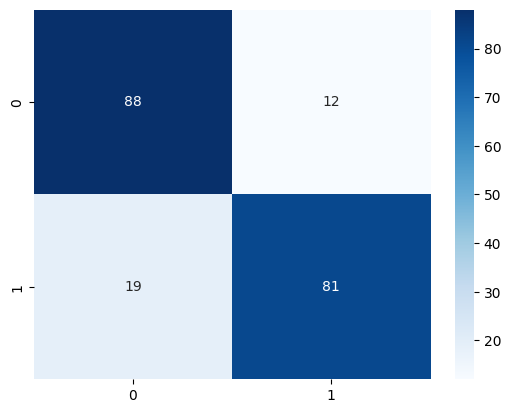

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
# sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
#              fmt='.2%', cmap='Blues', xticklabels=('1-5', '6-10', '11-15', '16-20'), yticklabels=('1-5', '6-10', '11-15', '16-20'));
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, 
             cmap='Blues', xticklabels=np.unique(predictions), yticklabels=np.unique(predictions));

<AxesSubplot:xlabel='feature'>

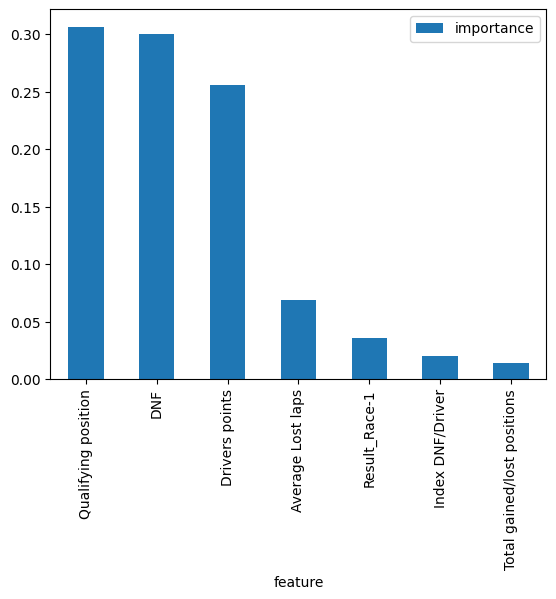

In [29]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rnd_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()

In [30]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 84.5 %
Error: 15.5 %


In [35]:
import pickle

with open('modelo-DNF1.model', "wb") as archivo_salida:
    pickle.dump(rnd_clfCV.best_estimator_, archivo_salida)


In [36]:
with open('modelo-DNF1.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
print(pipeline_importada)

RandomForestClassifier(max_depth=5, max_features=3, max_leaf_nodes=16,
                       n_estimators=200, random_state=42)


In [37]:
X_test.to_csv('x_test.csv')

In [39]:
pipeline_importada.predict_proba(X_test_scal)

array([[0.10188724, 0.89811276],
       [0.09210468, 0.90789532],
       [0.05968624, 0.94031376],
       [0.05740875, 0.94259125],
       [0.10706163, 0.89293837],
       [0.06325568, 0.93674432],
       [0.10311159, 0.89688841],
       [0.24200429, 0.75799571],
       [0.13090247, 0.86909753],
       [0.74977863, 0.25022137],
       [0.77680398, 0.22319602],
       [0.72057306, 0.27942694],
       [0.61131587, 0.38868413],
       [0.77987455, 0.22012545],
       [0.33462301, 0.66537699],
       [0.61754648, 0.38245352],
       [0.84676529, 0.15323471],
       [0.86873045, 0.13126955],
       [0.77611986, 0.22388014],
       [0.22941661, 0.77058339],
       [0.04734814, 0.95265186],
       [0.05557568, 0.94442432],
       [0.06378274, 0.93621726],
       [0.09576152, 0.90423848],
       [0.23802343, 0.76197657],
       [0.06853086, 0.93146914],
       [0.14375368, 0.85624632],
       [0.73750023, 0.26249977],
       [0.47915819, 0.52084181],
       [0.51039983, 0.48960017],
       [0.